## Lecture 11 – Common Types of Data Visualization 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
births = pd.read_csv('baby.csv')

In [3]:
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [4]:
births.shape

(1174, 6)

## Bar Plots

We often use bar plots to display distributions of a categorical variable:

In [5]:
births['Maternal Smoker'].value_counts()

False    715
True     459
Name: Maternal Smoker, dtype: int64

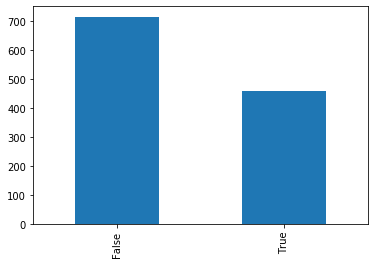

In [6]:
# built-in plot function in pandas
births['Maternal Smoker'].value_counts().plot(kind = 'bar');

Note: putting a semicolon after a plot call hides all of the unnecessary text that comes after it (the `<matplotlib.axes_....>`).

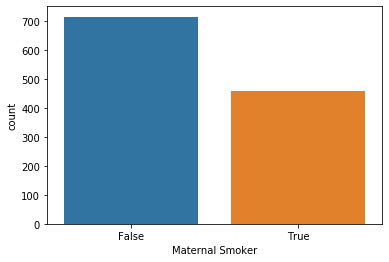

In [7]:
sns.countplot(births['Maternal Smoker']);

But we can also use them to display a numerical variable that has been measured on individuals in different categories.

In [8]:
# These are made up!
majors = ['Data Science', 'History', 'Biology', 'Business']
gpas = [3.35, 3.20, 2.98, 3.51]

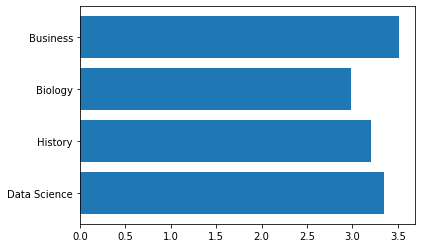

In [9]:
# What if we change bar to barh?
#plt.bar(majors, gpas);
plt.barh(majors, gpas);

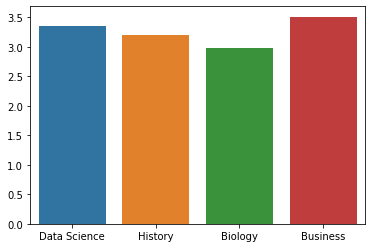

In [10]:
sns.barplot(majors, gpas);

## Rug plots

Used for visualizing a single quantitative variable. Rug plots show us each and every value.

In [11]:
bweights = births["Birth Weight"]

In [12]:
bweights

0       120
1       113
2       128
3       108
4       136
       ... 
1169    113
1170    128
1171    130
1172    125
1173    117
Name: Birth Weight, Length: 1174, dtype: int64

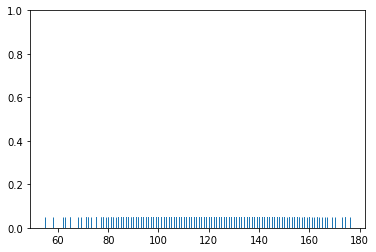

In [13]:
sns.rugplot(bweights);

## Histograms

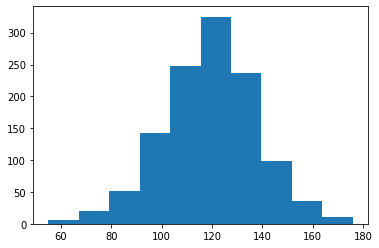

In [14]:
# By default, you get some arbitrary bins. We usually like to pick our own.
plt.hist(bweights);

In [15]:
min(bweights), max(bweights)

(55, 176)

In [16]:
bw_bins = range(50, 200, 5)

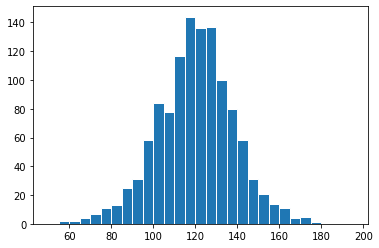

In [17]:
plt.hist(bweights, bins=bw_bins, ec='w');

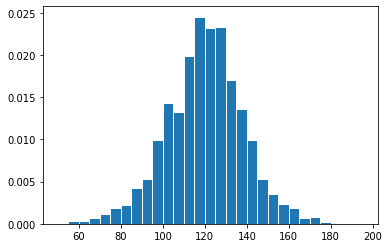

In [18]:
plt.hist(bweights, density=True, bins=bw_bins, ec='w');

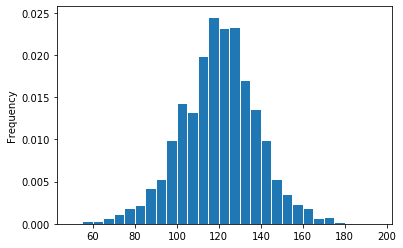

In [19]:
# alternative way of getting this plot
bweights.plot(kind = 'hist', density=True, bins=bw_bins, ec='w');

Increasing bin width loses granularity, but this may be fine for our purposes.

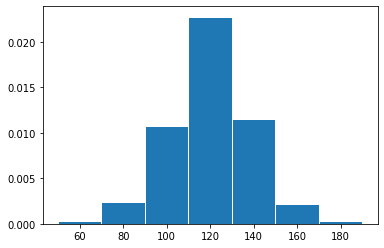

In [20]:
plt.hist(bweights, bins = np.arange(50, 200, 20), density=True, ec='w');

The bin widths don't all need to be the same!

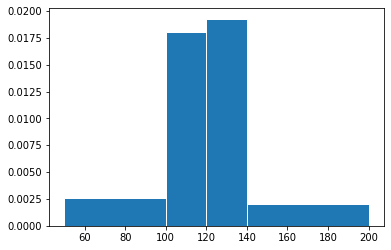

In [21]:
plt.hist(bweights, bins = [50, 100, 120, 140, 200], density=True, ec='w');

## Density Curves

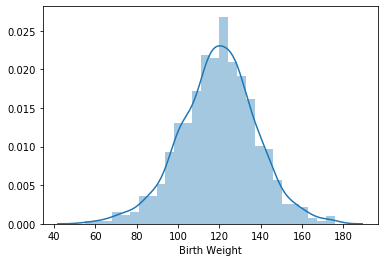

In [22]:
sns.distplot(bweights);

Can isolate the histogram:

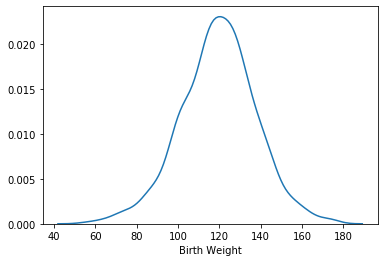

In [23]:
sns.distplot(bweights, hist=False);

Can even show a rugplot with it!

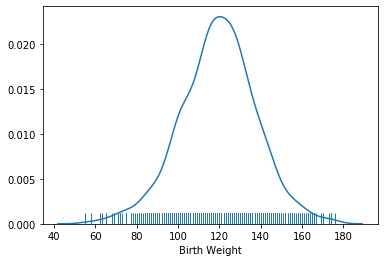

In [24]:
sns.distplot(bweights, hist=False, rug=True);

## Box Plots

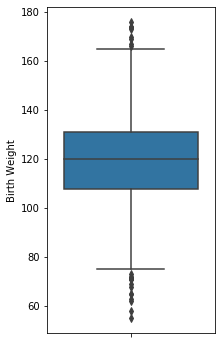

In [29]:
plt.figure(figsize = (3, 6))
sns.boxplot(bweights, orient='v'); 
# sns.boxplot(bweights); 

# the orient argument makes this vertical, to be consistent with the side by side ones

In [30]:
q1 = np.percentile(bweights, 25)
q2 = np.percentile(bweights, 50)
q3 = np.percentile(bweights, 75)
iqr = q3 - q1
whisk1 = q1 - 1.5*iqr
whisk2 = q3 + 1.5*iqr

whisk1, q1, q2, q3, whisk2

(73.5, 108.0, 120.0, 131.0, 165.5)

## Violin Plots

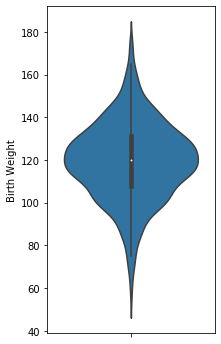

In [31]:
plt.figure(figsize = (3, 6))
sns.violinplot(bweights, orient='v');

## Overlaid Histograms and Density Curves

In [41]:
sm_bweights = births[births['Maternal Smoker'] == True]['Birth Weight']
nsm_bweights = births[births['Maternal Smoker'] == False]['Birth Weight']

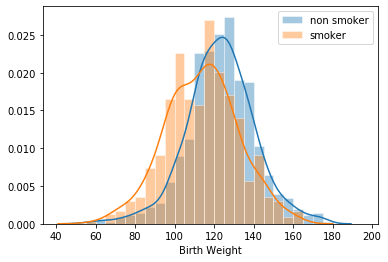

In [44]:
sns.distplot(nsm_bweights, bins=bw_bins, hist_kws=dict(ec='w'), label='non smoker');
sns.distplot(sm_bweights, bins=bw_bins, hist_kws=dict(ec='w'), label='smoker');
plt.legend();

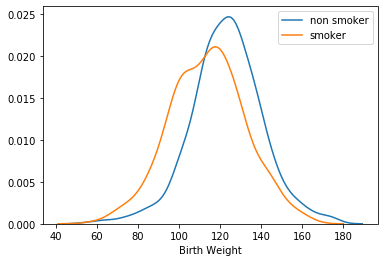

In [45]:
sns.distplot(nsm_bweights, bins=bw_bins, hist=False, hist_kws=dict(ec='w'), label='non smoker');
sns.distplot(sm_bweights, bins=bw_bins, hist=False, hist_kws=dict(ec='w'), label='smoker');
plt.legend();

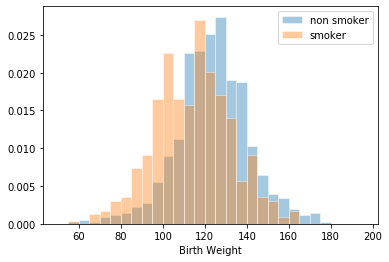

In [46]:
# Alpha adjusts transparency of the bins
plt.hist(nsm_bweights, bins = bw_bins, ec='w', density=True, alpha=0.4, label='non smoker');
plt.hist(sm_bweights, bins = bw_bins, ec='w', density=True, alpha=0.4, label='smoker');
plt.xlabel('Birth Weight')
plt.legend();

## Side by side box plots and violin plots

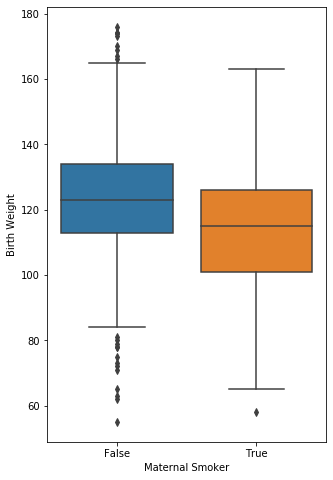

In [47]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=births, x = 'Maternal Smoker', y = 'Birth Weight');

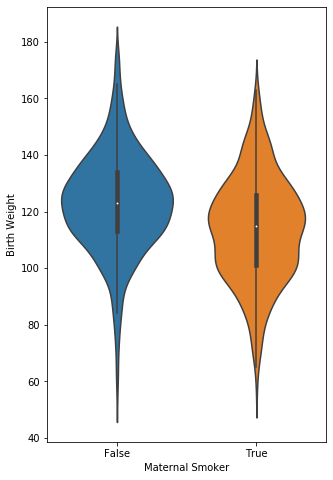

In [49]:
plt.figure(figsize=(5, 8))
sns.violinplot(data=births, x = 'Maternal Smoker', y = 'Birth Weight');

A less fancy version of the above two plots:

In [51]:
two_distributions = [nsm_bweights.values, sm_bweights.values]
groups = ['non-smokers', 'smokers']

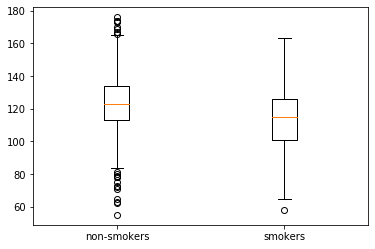

In [52]:
plt.boxplot(two_distributions, labels=groups);

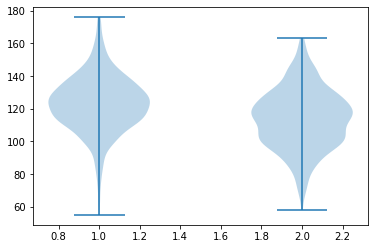

In [53]:
plt.violinplot(two_distributions);

## Scatter plots

In [65]:
births

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


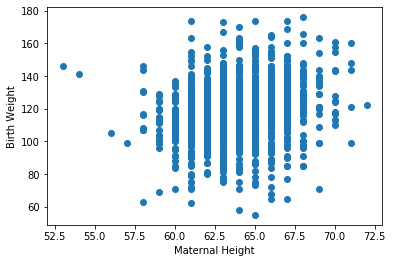

In [66]:
plt.scatter(births['Maternal Height'], births['Birth Weight'])
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');

In [67]:
births['Birth Weight']

0       120
1       113
2       128
3       108
4       136
       ... 
1169    113
1170    128
1171    130
1172    125
1173    117
Name: Birth Weight, Length: 1174, dtype: int64

In [68]:
births['Maternal Height']

0       62
1       64
2       64
3       67
4       62
        ..
1169    60
1170    67
1171    65
1172    65
1173    65
Name: Maternal Height, Length: 1174, dtype: int64

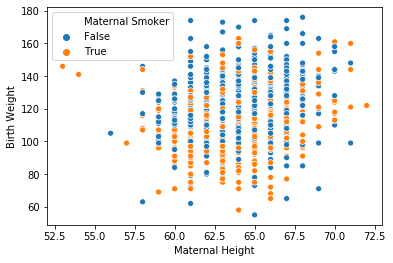

In [69]:
sns.scatterplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue = 'Maternal Smoker');

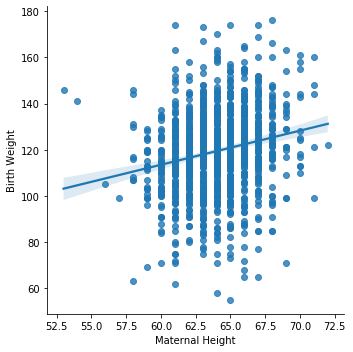

In [73]:
#sns.lmplot(data = births, x = 'Maternal Height', y = 'Birth Weight', ci=False);
sns.lmplot(data = births, x = 'Maternal Height', y = 'Birth Weight');

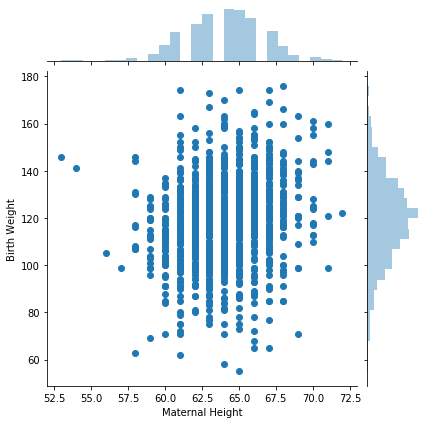

In [74]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight');

## Hex plots and contour plots

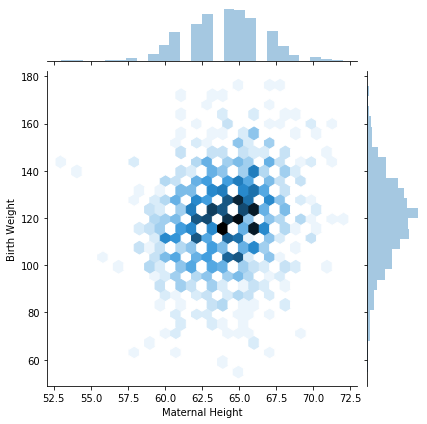

In [75]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind='hex');

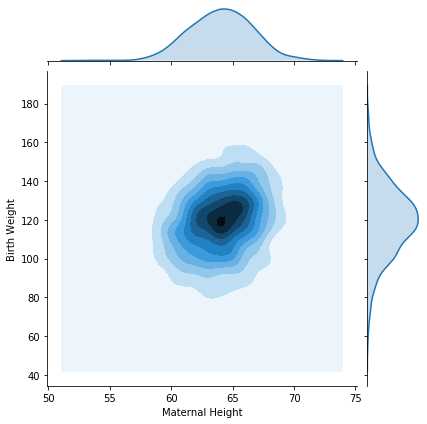

In [76]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind='kde');